<a href="https://colab.research.google.com/github/Saijash84/mainflow/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/archive (4).zip',parse_dates=['Date'])
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df = df.set_index('Date')

In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


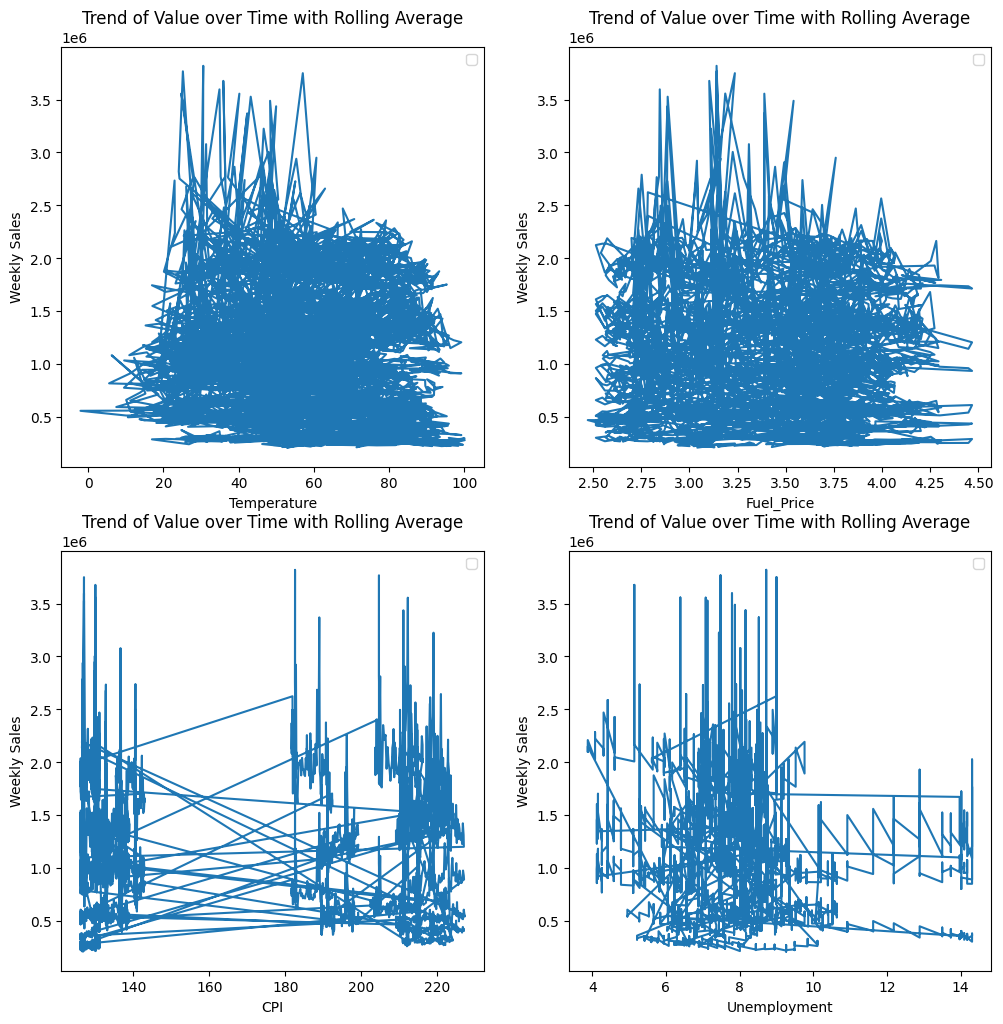

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.plot( df['Temperature'],df["Weekly_Sales"] )
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Trend of Value over Time with Rolling Average')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot( df['Fuel_Price'],df["Weekly_Sales"] )
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly Sales')
plt.title('Trend of Value over Time with Rolling Average')
plt.legend()

plt.subplot(2,2,3)
plt.plot( df['CPI'],df["Weekly_Sales"] )
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('Trend of Value over Time with Rolling Average')
plt.legend()

plt.subplot(2,2,4)
plt.plot( df['Unemployment'],df["Weekly_Sales"] )
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Trend of Value over Time with Rolling Average')
plt.legend()
plt.show()


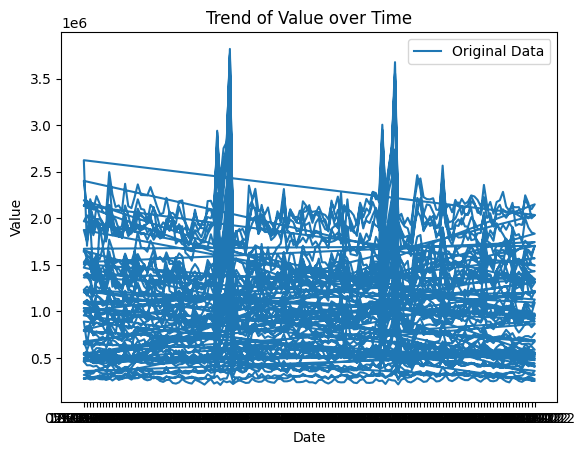

In [ ]:
plt.plot(df.index, df['Weekly_Sales'], label='Original Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trend of Value over Time')
plt.legend()
plt.show()

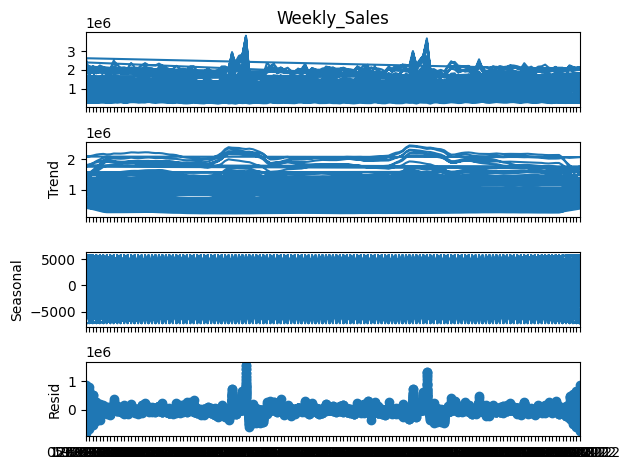

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Value' is the column to decompose and the data has a monthly frequency
result = seasonal_decompose(df['Weekly_Sales'], model='additive', period=12)

result.plot()
plt.show()

**Sentiment Analysis**

In [ ]:
df1=pd.read_csv('/content/archive (5).zip')
df1.head()

,date,rainfall
0,2022-01-01,12.5
1,2022-01-02,8.2
2,2022-01-03,0.0
3,2022-01-04,3.7
4,2022-01-05,21.1


In [ ]:
#sentimental Analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
analyzer=SentimentIntensityAnalyzer()
scores=analyzer.polarity_scores(''.join(df1['rainfall'].astype(str)))
scores

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('punkt')

text = "This movie was absolutely fantastic! I loved the plot and the acting."
tokens = nltk.word_tokenize(text)  # Tokenize the text

sentiment_scores = []
for token in tokens:
    synsets = list(swn.senti_synsets(token))
    if synsets:
        # Get the first synset (most common sense) and its scores
        synset = synsets[0]
        sentiment_scores.append((synset.pos_score(), synset.neg_score(), synset.obj_score()))

# Calculate average sentiment scores
if sentiment_scores:
    avg_pos = sum(score[0] for score in sentiment_scores) / len(sentiment_scores)
    avg_neg = sum(score[1] for score in sentiment_scores) / len(sentiment_scores)
    avg_obj = sum(score[2] for score in sentiment_scores) / len(sentiment_scores)
    print(f"Positive: {avg_pos}, Negative: {avg_neg}, Objective: {avg_obj}")

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Positive: 0.171875, Negative: 0.0, Objective: 0.828125


**Clustering and pattern recognition**

In [ ]:
df2=pd.read_csv("/content/archive (2) (1).zip")
df2.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2022 Squad,Team,Base Price IN ₹,Base Price IN $
0,0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,Gujarat Titans,NaN,NaN
1,1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,Gujarat Titans,NaN,NaN
2,2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,Gujarat Titans,NaN,NaN
3,3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,Gujarat Titans,NaN,NaN
4,4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,Gujarat Titans,NaN,NaN


In [ ]:
df2.isnull().sum()

,0
Unnamed: 0,0
Player,0
Base Price,325
TYPE,0
COST IN ₹ (CR.),325
Cost IN $ (000),325
2022 Squad,338
Team,0
Base Price IN ₹,243
Base Price IN $,243


In [ ]:
df2['2022 Squad'].fillna("New",inplace=True)

In [ ]:
df2['COST IN ₹ (CR.)'].fillna(df2['COST IN ₹ (CR.)'].mean(),inplace=True)
df2.fillna(method='ffill', inplace=True)

<ipython-input-67-6e36e98021a8>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2.fillna(method='ffill', inplace=True)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
#Using standard scaler to normalise values
x=df2.iloc[:,4:6].values
scaler=StandardScaler()
features=scaler.fit_transform(x)

In [ ]:
#Applying kmeans clustering
wcss = []
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(features)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

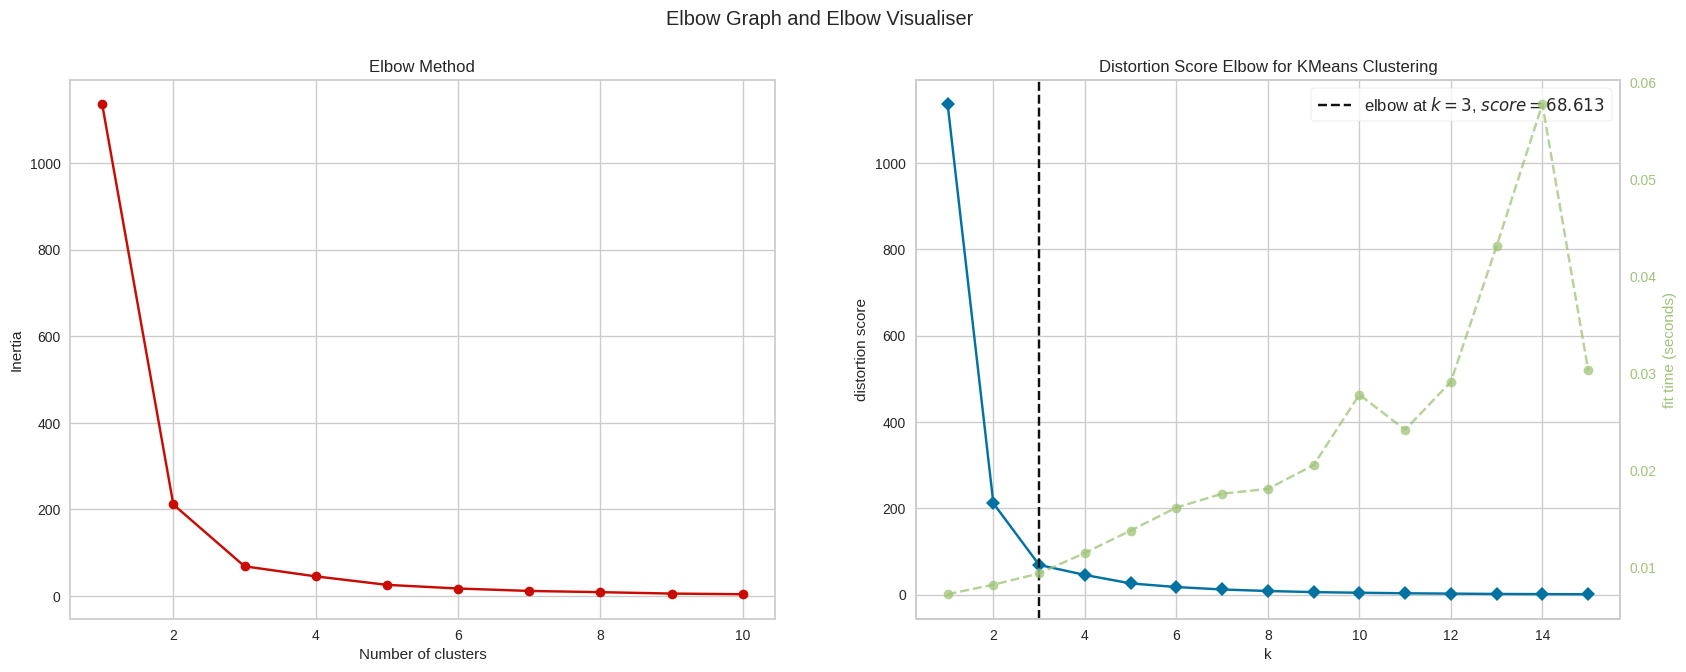

In [ ]:
#Visualising the kmeans clusters
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,11),wcss,'ro-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.subplot(1,2,2)
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,16))
visualizer.fit(features)
plt.suptitle('Elbow Graph and Elbow Visualiser')
visualizer.poof()
plt.show()

No. of clusters =3

In [77]:
#Fitting the features to kmeans of 5 clusters
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
clusters=kmeans.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


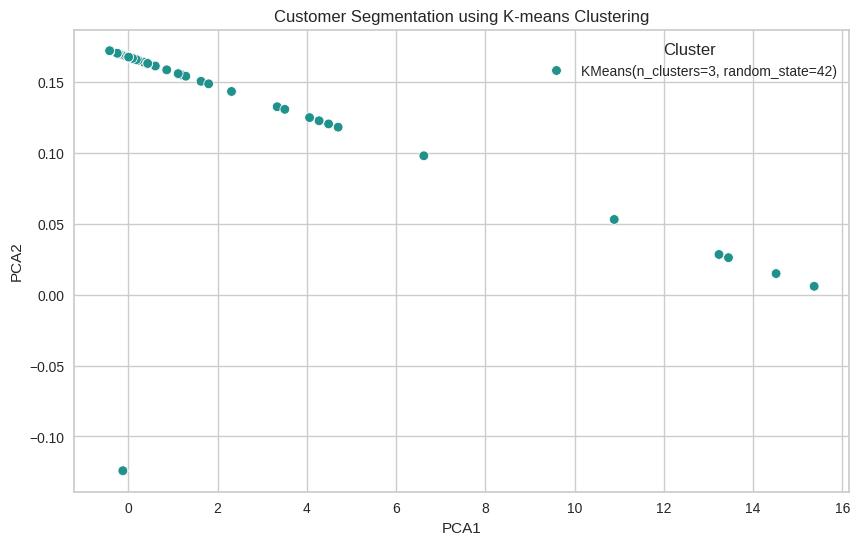

In [78]:
#Customer segmentation
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

# Create a dataframe for visualization
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis',)
plt.title('Customer Segmentation using K-means Clustering')
plt.show()